# <center>Financial Data Analysis - Regression</center>

## Libraries imported to assist in the analysis

Below are the set of libraries imported into this python notebook that is useful in doing exploratory and predictive data analysis.

In [2]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
from pandas.plotting import scatter_matrix

import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.neural_network import MLPClassifier,MLPRegressor
import matplotlib.pyplot as plt
import matplotlib

## Importing the data

A boxplot of imported data is constructed to understand the inner structure of the data

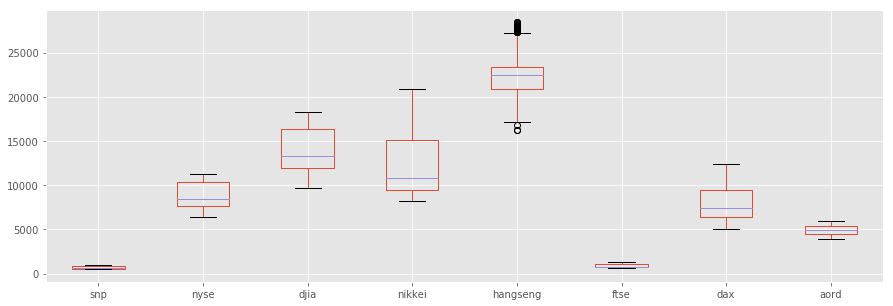

In [3]:
matplotlib.style.use('ggplot')
cd=pd.read_pickle("closing_date_dynamic.pickle")
plt.figure(figsize=(15,5))
cd.boxplot()
plt.show()
# cd.describe()

## Scaling stock market indexes

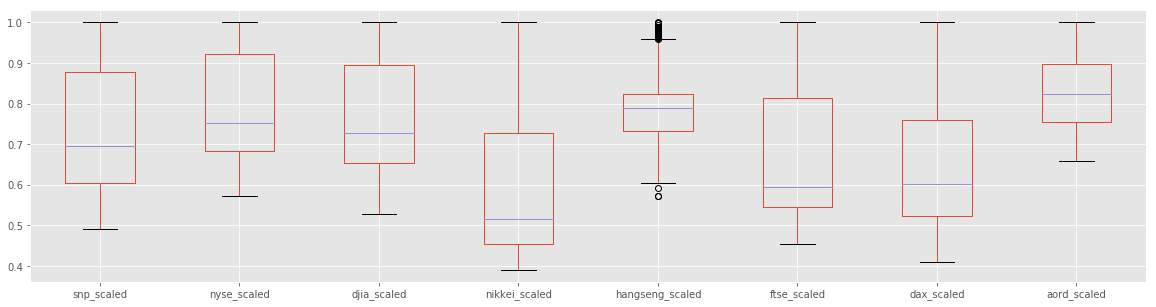

In [4]:
column_names=cd.columns.values+"_scaled"
for i in range(0,len(column_names)):
    cd[column_names[i]]=cd.iloc[:,i]/max(cd.iloc[:,i])
# cd.head()
cd=cd.iloc[:,len(column_names):]
plt.figure(figsize=(20,5))
cd.boxplot()
plt.show()
# cd.describe()

# Predictive Analysis

## 1) Seperating data into training and testing dataset

In [5]:
# Creating dataframe for Linear Regression Analysis
# sclaed with max value
closing_data=cd.copy()   # using all scaled features 

# Sample train and test data : we are using 80% of the dataset as training data
predictors_tf = closing_data[closing_data.columns[1:]]
classes_tf = closing_data[closing_data.columns[:1]]

training_set_size = int(len(closing_data) * 0.8)
test_set_size = len(closing_data) - training_set_size

training_predictors_tf = predictors_tf[:training_set_size]
training_classes_tf = classes_tf[:training_set_size]
test_predictors_tf = predictors_tf[training_set_size:]
test_classes_tf = classes_tf[training_set_size:]

training_predictors_tf.head()
# training_classes_tf.head()

,nyse_scaled,djia_scaled,nikkei_scaled,hangseng_scaled,ftse_scaled,dax_scaled,aord_scaled
Date,,,,,,,
2010-01-04,0.651865,0.577967,0.510580,0.767270,0.566365,0.488762,0.821153
2010-01-05,0.654368,0.577315,0.511875,0.783313,0.562594,0.487434,0.829499
2010-01-06,0.656399,0.577406,0.514253,0.788133,0.559578,0.487633,0.830725
2010-01-07,0.657843,0.579218,0.511867,0.782957,0.550528,0.486424,0.827988
2010-01-08,0.660638,0.579836,0.517458,0.783917,0.547888,0.487898,0.829952


## 2) Predict S&P index value using Linear Regression

Mean squared error:  0.000760644013219
R squared value:  0.989934550169
Root Mean Squared Error:  0.0275797754382


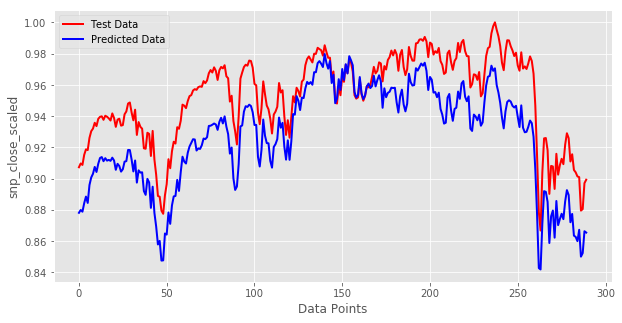

In [6]:
# Predicting the S&P index value using Linear Regression

# Step 1) Create Linear Regression object
regr = LinearRegression()

# Step 2) Use object created above to build the Linear Regression model and train on the dataset
model=regr.fit(training_predictors_tf.as_matrix(), training_classes_tf.as_matrix()[:,0])

# Step 3) Predict on the test data using model created above
predicted=regr.predict(test_predictors_tf.as_matrix())

# Step 4) Calculate the accuracy achieved
print("Mean squared error: ",
      np.mean((predicted- test_classes_tf.as_matrix()[:,0]) ** 2))

SSE = np.sum((regr.predict(test_predictors_tf.as_matrix()) - test_classes_tf.as_matrix()[:,0]) ** 2)
SST = np.sum((np.mean(training_classes_tf.as_matrix()[:,0]) - test_classes_tf.as_matrix()[:,0])**2) 
R2=1.0-1.0*SSE/SST  
RMSE=np.sqrt(SSE/len(test_classes_tf.as_matrix()[:,0])) 

print("R squared value: ",R2)
print("Root Mean Squared Error: ",RMSE)

# Step 5) Plot the  outputs
plt.figure(figsize=(10,5))
plt.plot(pd.Series(range(0,len(test_classes_tf.as_matrix()[:,0]))),test_classes_tf.as_matrix()[:,0],
         color='red',label='Test Data',linewidth=2)
plt.plot(pd.Series(range(0,len(test_classes_tf.as_matrix()[:,0]))), 
         regr.predict(test_predictors_tf.as_matrix()), color='blue',
        linewidth=2,label="Predicted Data")
plt.xlabel("Data Points")
plt.ylabel("snp_close_scaled")
plt.legend(loc='upper left')
plt.show()
# cd

## 3) Predict S&P index value using Neural Network MLP Regressor

Mean squared error:  0.065880891727
R squared value:  0.128211359135
Root Mean Squared Error:  0.25667273273


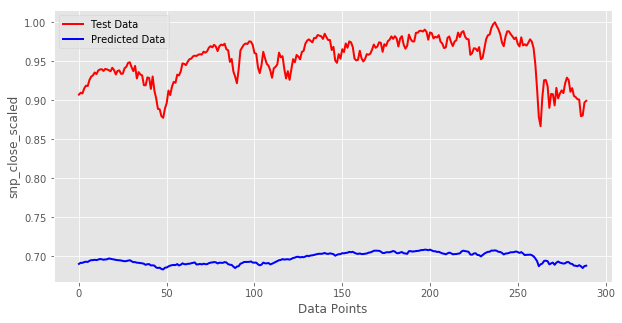

In [7]:
# Predicting the S&P index value using Neural Network MLP Regressor

# Step 1) Create Neural Network MLP Regressor object with personlized arguments
mlpr = MLPRegressor(solver='adam',alpha=1e-5,
                     hidden_layer_sizes=(2, ), random_state=1,activation='logistic',max_iter=200)

# Step 2) Use object created above to build the Neural Network model and train on the dataset
model=mlpr.fit(training_predictors_tf.as_matrix(), training_classes_tf.as_matrix()[:,0]) 

# Step 3) Predict on the test data using model created above
predicted=mlpr.predict(test_predictors_tf.as_matrix())

# Step 4) Calculate the accuracy achieved
print("Mean squared error: ",
      np.mean((predicted- test_classes_tf.as_matrix()[:,0]) ** 2))

SSE = np.sum((mlpr.predict(test_predictors_tf.as_matrix()) - test_classes_tf.as_matrix()[:,0]) ** 2)
SST = np.sum((np.mean(training_classes_tf.as_matrix()[:,0]) - test_classes_tf.as_matrix()[:,0])**2) 
R2=1.0-1.0*SSE/SST 
RMSE=np.sqrt(SSE/len(test_classes_tf.as_matrix()[:,0])) 

print("R squared value: ",R2)
print("Root Mean Squared Error: ",RMSE)

# Step 5) Plot the  outputs
plt.figure(figsize=(10,5))
plt.plot(pd.Series(range(0,len(test_classes_tf.as_matrix()[:,0]))),test_classes_tf.as_matrix()[:,0],
         color='red',label='Test Data',linewidth=2)
plt.plot(pd.Series(range(0,len(test_classes_tf.as_matrix()[:,0]))), 
         predicted, color='blue',
        linewidth=2,label="Predicted Data")
plt.xlabel("Data Points")
plt.ylabel("snp_close_scaled")
plt.legend(loc='upper left')
plt.show()
# cd

## 4) Predict S&P index value using RandomForestRegressor

Mean squared error:  0.00189223517813
R squared value:  0.974960431001
Root Mean Squared Error:  0.0434998296334


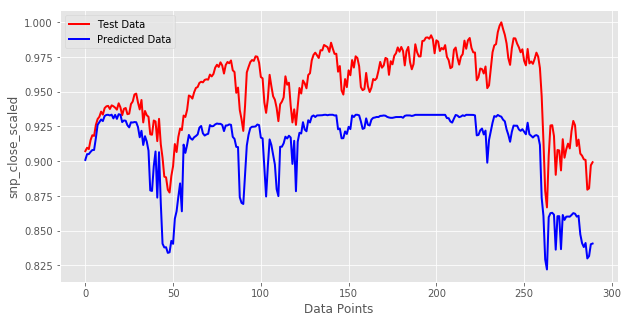

In [8]:
# Predicting the S&P trend(whether it will go up or down) using RandomForestRegressor

# Step 1) Create Random Forest Regressor object with personlized arguments
rfr = RandomForestRegressor(n_estimators=1000)

# Step 2) Use object created above to build the RandomForestRegressor model and train on the dataset
model=rfr.fit(training_predictors_tf.as_matrix(), training_classes_tf.as_matrix()[:,0])

# Step 3) Predict on the test data using model created above
predicted=rfr.predict(test_predictors_tf.as_matrix())

# Step 4) Calculate the accuracy achieved
print("Mean squared error: ",
      np.mean((predicted- test_classes_tf.as_matrix()[:,0]) ** 2))

SSE = np.sum((rfr.predict(test_predictors_tf.as_matrix()) - test_classes_tf.as_matrix()[:,0]) ** 2)
SST = np.sum((np.mean(training_classes_tf.as_matrix()[:,0]) - test_classes_tf.as_matrix()[:,0])**2) 
R2=1.0-1.0*SSE/SST 
RMSE=np.sqrt(SSE/len(test_classes_tf.as_matrix()[:,0])) 

print("R squared value: ",R2)
print("Root Mean Squared Error: ",RMSE)

# Step 5) Plot the  outputs
plt.figure(figsize=(10,5))
plt.plot(pd.Series(range(0,len(test_classes_tf.as_matrix()[:,0]))),test_classes_tf.as_matrix()[:,0],
         color='red',label='Test Data',linewidth=2)
plt.plot(pd.Series(range(0,len(test_classes_tf.as_matrix()[:,0]))), 
         predicted, color='blue',
        linewidth=2,label="Predicted Data")
plt.xlabel("Data Points")
plt.ylabel("snp_close_scaled")
plt.legend(loc='upper left')
plt.show()
# cd